In [62]:
import pandas as pd
import pingouin as pg
import scipy.stats as ss
import statsmodels.stats.multicomp as ssm
import statsmodels.stats.anova as asa
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
task_1 = pd.read_csv('5_task_1.csv')

In [3]:
task_2 = pd.read_csv('5_task_2.csv')

In [9]:
pg.anova(data=task_1, dv='events', between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [14]:
task_1

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [21]:
group_a = task_1.query("group == 'A'").events

In [22]:
group_b = task_1.query("group == 'B'").events

In [23]:
group_c = task_1.query("group == 'C'").events

In [24]:
ss.levene(group_a, group_b, group_c)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [11]:
pg.homoscedasticity(data=task_1, dv='events', group='group')

,W,pval,equal_var
levene,2.26226,0.104133,True


In [38]:
pg.normality(data=task_1, dv='events', group='group', method='normaltest')

,W,pval,normal
group,,,
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


In [34]:
ss.normaltest(group_b)

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

In [35]:
ss.normaltest(group_c)

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

In [40]:
ss.f_oneway(group_a, group_b, group_c)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

<AxesSubplot:xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

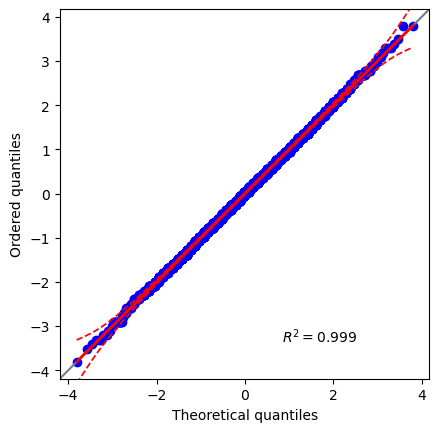

In [29]:
pg.qqplot(group_b)

<AxesSubplot:xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

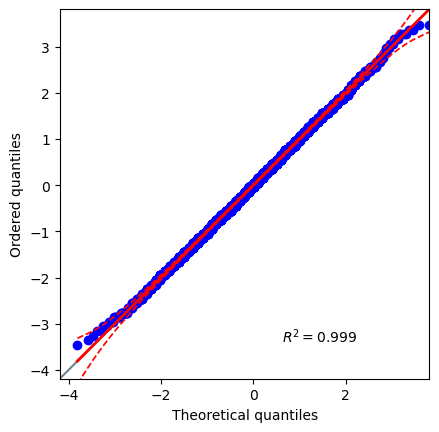

In [31]:
pg.qqplot(group_c)

In [42]:
ssm.pairwise_tukeyhsd(task_1.events, task_1.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.0,7.7038,8.3642,True
A,C,-2.1093,0.0,-2.4395,-1.7791,True
B,C,-10.1433,0.0,-10.4735,-9.8131,True


In [43]:
pg.pairwise_tukey(task_1, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.024138


In [5]:
task_2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


<AxesSubplot:xlabel='events', ylabel='Count'>

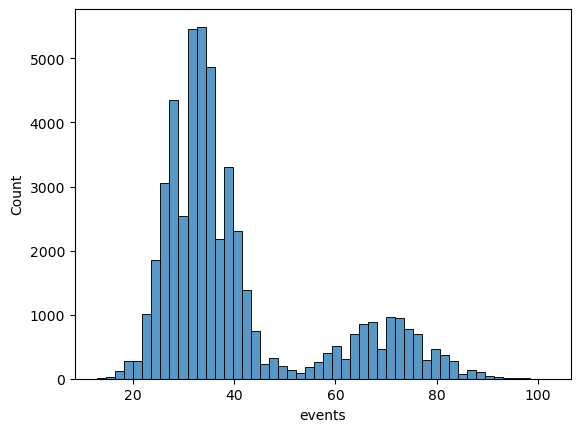

In [49]:
sns.histplot(task_2.query('group == "test"').events, bins=50)

<AxesSubplot:xlabel='events', ylabel='Count'>

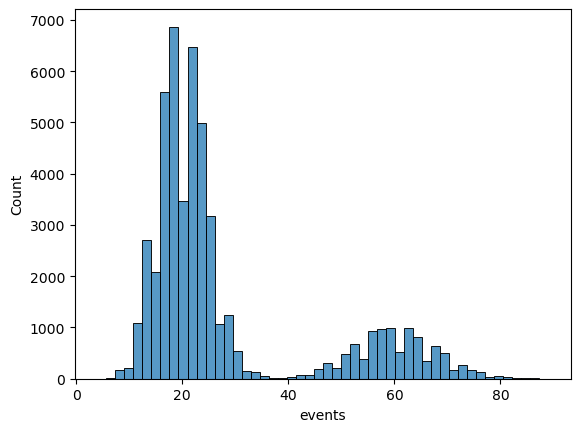

In [50]:
sns.histplot(task_2.query('group == "control"').events, bins=50)

In [51]:
task_2.groupby(['group', 'segment']).events.describe()

count       mean       std   min   25%   50%   75%    max
group   segment                                                             
control high     10000.0  59.970800  7.805347  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.031575  4.473576   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.938500  8.403974  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.025925  5.720845  13.0  29.0  33.0  37.0   59.0

In [60]:
segment_group = smf.ols("events ~ segment + group + segment:group", task_2).fit()

In [63]:
asa.anova_lm(segment_group, typ=2)

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377485,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [64]:
pg.anova(data=task_2, dv="events", between=["group", "segment"])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377485,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [65]:
task_2['combination'] = task_2['group'] + '/' + task_2['segment']

In [66]:
pg.pairwise_tukey(data=task_2, dv='events', between='combination')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control/high,control/low,59.970800,20.031575,39.939225,0.065432,610.391461,0.0,7.521612
1,control/high,test/high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.0,-1.228989
2,control/high,test/low,59.970800,33.025925,26.944875,0.065432,411.798717,0.0,4.350026
3,control/low,test/high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.0,-9.091140
4,control/low,test/low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.0,-2.530414
5,test/high,test/low,69.938500,33.025925,36.912575,0.065432,564.135148,0.0,5.814008


<AxesSubplot:xlabel='segment', ylabel='events'>

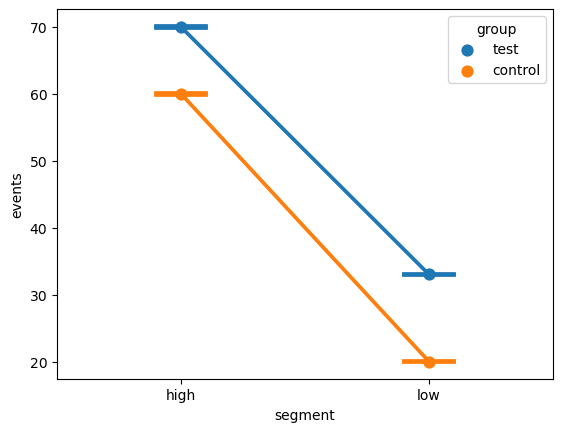

In [73]:
sns.pointplot(data=task_2, x='segment', y='events', hue='group', capsize = .2)

<AxesSubplot:xlabel='group', ylabel='events'>

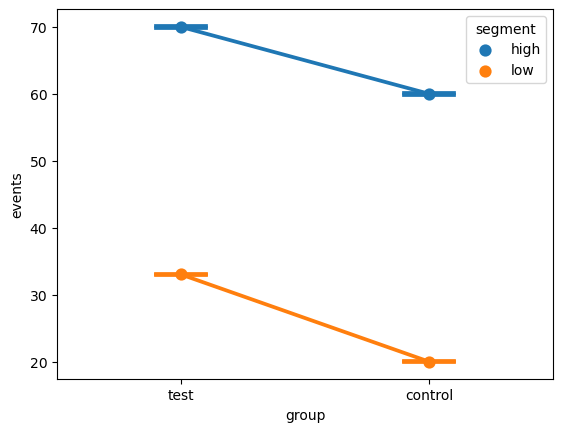

In [72]:
sns.pointplot(data=task_2, x='group', y='events', hue='segment', capsize = .2)